<a href="https://colab.research.google.com/github/JosePabloGFnl/Redes-Neuronales-Artificiales/blob/main/Tarea2.4/2_4_Visualizaci%C3%B3n_y_estad%C3%ADstica_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

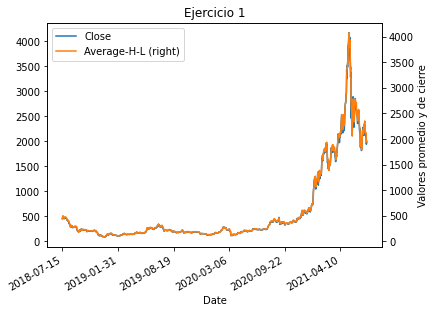

In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

#1.- Despliege visualmente los valores promedio y de cierre durante todo el intervalo
#de tiempo considerado.
df=pd.read_csv('ETH-USD.csv')


df['Average-H-L'] = df[['High', 'Low']].mean(axis=1)
df = df[['Date','Close','Average-H-L']]

ax1 = df.plot(x ='Date', y='Close', kind = 'line')
ax2 = df.plot(x ='Date', y='Average-H-L',secondary_y=True, ax=ax1)

y1 = df['Close']
y2 = df['Average-H-L']

ny = ((y2-np.min(y2))/(np.max(y2)-np.min(y2)))*(np.max(y1)-np.min(y1))+np.min(y1)

ax1.fill_between(df['Date'],y1,ny, where=y1<=ny, interpolate=True, color='grey', alpha=0.5)
ax1.fill_between(df['Date'],y1,ny, where=y1>=ny, interpolate=True, color='grey', alpha=0.5)

plt.xlabel('Intérvalo de tiempo considerado')
plt.ylabel('Valores promedio y de cierre')
plt.title('Ejercicio 1')

x = plt.gca().xaxis

#para evitar que el text del eje x se vea mal
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')

for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.1)

plt.show()

In [20]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

#2.- Genere una nueva tabla de datos que incluya los valores de cierre para los años 2018 y 2019 concentrados de 
#manera mensual. Encuentre la matriz de correlaciones entre ambas tablas. ¿Existe correlación significativa entre 
#los valores de cierre para algún o algunos de  los meses del año? (Ayuda: recordemos que para invocar el método 
#de análisis de correlaciones, los datos deben acomodarse en una matriz cuadrada, como en el ejercicio de los 
#precios de propiedades visto en clase.)
df2=pd.read_csv('ETH-USD.csv')


df2['Average-H-L'] = df2[['High', 'Low']].mean(axis=1)
#separando por meses
df2 = df2[['Date','Close','Average-H-L']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2['month'] = df2['Date'].dt.month_name()

df2 = pd.pivot_table(df2, index='Date', columns='month', values='Close', fill_value=0)

df2.columns = [f'Close{m}' for m in df2.columns]

df2 = df2.reset_index()

#dataframes de los años 2018 y 2019
df2018 = df2[df2['Date'].dt.year == 2018]
df2018 = df2018[['CloseApril',	'CloseAugust',	'CloseDecember',	'CloseFebruary',	'CloseJanuary',	'CloseJuly',	'CloseJune',	'CloseMarch',	'CloseMay',	'CloseNovember',	'CloseOctober',	'CloseSeptember']]

df2019 = df2[df2['Date'].dt.year == 2019]
df2019 = df2019[['CloseApril',	'CloseAugust',	'CloseDecember',	'CloseFebruary',	'CloseJanuary',	'CloseJuly',	'CloseJune',	'CloseMarch',	'CloseMay',	'CloseNovember',	'CloseOctober',	'CloseSeptember']]

result = pd.concat([df2018,df2019], axis=0, ignore_index=True)

corr_result = result.corr()
corr_result

,CloseApril,CloseAugust,CloseDecember,CloseFebruary,CloseJanuary,CloseJuly,CloseJune,CloseMarch,CloseMay,CloseNovember,CloseOctober,CloseSeptember
CloseApril,1.000000,-0.084530,-0.086773,-0.056765,-0.059857,-0.072131,-0.059023,-0.060353,-0.059246,-0.084971,-0.087698,-0.085403
CloseAugust,-0.084530,1.000000,-0.123782,-0.080976,-0.085386,-0.102895,-0.084196,-0.086094,-0.084515,-0.121211,-0.125101,-0.121828
CloseDecember,-0.086773,-0.123782,1.000000,-0.083125,-0.087652,-0.105626,-0.086430,-0.088379,-0.086758,-0.124427,-0.128421,-0.125061
CloseFebruary,-0.056765,-0.080976,-0.083125,1.000000,-0.057341,-0.069099,-0.056541,-0.057816,-0.056755,-0.081398,-0.084011,-0.081812
CloseJanuary,-0.059857,-0.085386,-0.087652,-0.057341,1.000000,-0.072862,-0.059621,-0.060965,-0.059847,-0.085832,-0.088587,-0.086269
CloseJuly,-0.072131,-0.102895,-0.105626,-0.069099,-0.072862,1.000000,-0.071847,-0.073466,-0.072119,-0.103432,-0.106752,-0.103959
CloseJune,-0.059023,-0.084196,-0.086430,-0.056541,-0.059621,-0.071847,1.000000,-0.060115,-0.059012,-0.084635,-0.087352,-0.085066
CloseMarch,-0.060353,-0.086094,-0.088379,-0.057816,-0.060965,-0.073466,-0.060115,1.000000,-0.060343,-0.086543,-0.089321,-0.086983
CloseMay,-0.059246,-0.084515,-0.086758,-0.056755,-0.059847,-0.072119,-0.059012,-0.060343,1.000000,-0.084956,-0.087683,-0.085388
CloseNovember,-0.084971,-0.121211,-0.124427,-0.081398,-0.085832,-0.103432,-0.084635,-0.086543,-0.084956,1.000000,-0.125754,-0.122463
